# Monte Carlo Simulation on Structured Products

Though there are a number of different types of structured products used for a number of purposes, the type we will be looking as is a "Worst-of Basket". The product document is available here: https://drive.google.com/file/d/1kQvQsjlCOoIERHARx8cNbGTJACO9IJRN/view?usp=sharing

Let's start with the equities listed in the document.

### Extract Data:
Retrieve the stock prices for five stocks (BMW, DIAGEO, NESTLE, NIKE, VISA) from their respective exchanges for the period of one year before the initial strike price, starting from November 19th, 2017 and ending on November 19th, 2018."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf 
import scipy.stats

### BMW

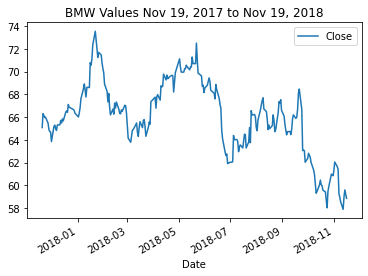

In [2]:
# BMW: BMW.DE
ticker = yf.Ticker('BMW.DE')
BMW = ticker.history(start="2017-11-19", end="2018-11-19")
BMW = BMW.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = BMW.plot(title="BMW Values Nov 19, 2017 to Nov 19, 2018")

### DIAGEO

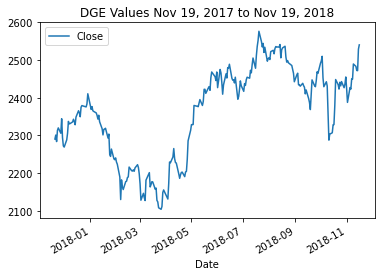

In [3]:
# DIAGEO: DGE.L
ticker = yf.Ticker('DGE.L')
DGE = ticker.history(start="2017-11-19", end="2018-11-19")
DGE = DGE.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = DGE.plot(title="DGE Values Nov 19, 2017 to Nov 19, 2018")

### NESTLE

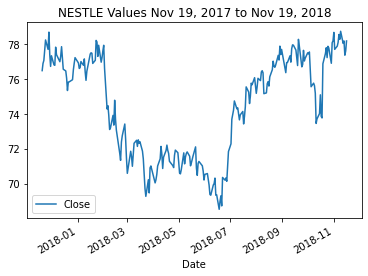

In [4]:
# NESTLE: NSRGY
ticker = yf.Ticker('NSRGY')
NESTLE = ticker.history(start="2017-11-19", end="2018-11-19")
NESTLE = NESTLE.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NESTLE.plot(title="NESTLE Values Nov 19, 2017 to Nov 19, 2018")

### NIKE

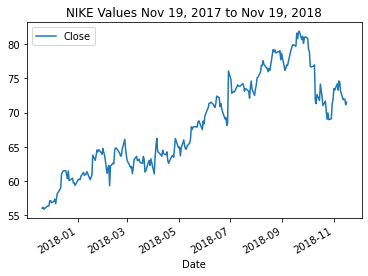

In [5]:
# NIKE: NKE
ticker = yf.Ticker('NKE')
NIKE = ticker.history(start="2017-11-19", end="2018-11-19")
NIKE = NIKE.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NIKE.plot(title="NIKE Values Nov 19, 2017 to Nov 19, 2018")

### VISA

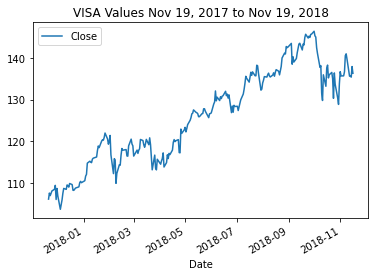

In [6]:
# VISA: V
ticker = yf.Ticker('V')
VISA = ticker.history(start="2017-11-19", end="2018-11-19")
VISA = VISA.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = VISA.plot(title="VISA Values Nov 19, 2017 to Nov 19, 2018")

## Observations and Notes
These five stocks are traded on different exchanges, and in different currencies. Therefore if you compare these values against the values reported in the structured product, they are slightly different for these reasons. However, when doing the computations for such events as early redemption, these exchange rates, differences in exchanges, etc., largely don't matter (certainly not for the purpose of our simulation). 

## Summary table (to be presented at the end):

In [7]:
df = pd.DataFrame(index = ['log change mean', 'log change standard deviation', '85% of initial price', 'prob at n=1', 'prob at n=2', 'prob at n=3', 'prob at n=4'], columns= ['BMW', 'DIAGEO', 'NESTLE', 'NIKE', 'VISA'])

### Question 1: 
Compute the Average and Standard Deviation for each of the equities over the past year

### BMW

In [8]:
BMW['ln Close t'] = np.log(BMW['Close'])
BMW['ln Close t-1'] = BMW['ln Close t'].shift()
BMW['ln change'] = BMW['ln Close t']-BMW['ln Close t-1']

BMW_mean = BMW['ln change'].mean()
BMW_stddev = BMW['ln change'].std()

df['BMW']['log change mean'] = BMW_mean
df['BMW']['log change standard deviation'] = BMW_stddev

print("BMW mean log change = ",BMW_mean)
print("BMW log change standard deviation =",BMW_stddev)

BMW mean log change =  -0.0003984237976179695
BMW log change standard deviation = 0.011462001209757147


### DIAGEO

In [9]:
DGE['ln Close t'] = np.log(DGE['Close'])
DGE['ln Close t-1'] = DGE['ln Close t'].shift()
DGE['ln change'] = DGE['ln Close t']-DGE['ln Close t-1']

DGE_mean = DGE['ln change'].mean()
DGE_stddev = DGE['ln change'].std()

df['DIAGEO']['log change mean'] = DGE_mean
df['DIAGEO']['log change standard deviation'] = DGE_stddev

print("DGE mean log change = ",DGE_mean)
print("DGE log change standard deviation =",DGE_stddev)

DGE mean log change =  0.00041287797221428084
DGE log change standard deviation = 0.009666473152330124


### NESTLE

In [10]:
NESTLE['ln Close t'] = np.log(NESTLE['Close'])
NESTLE['ln Close t-1'] = NESTLE['ln Close t'].shift()
NESTLE['ln change'] = NESTLE['ln Close t']-NESTLE['ln Close t-1']

NESTLE_mean = NESTLE['ln change'].mean()
NESTLE_stddev = NESTLE['ln change'].std()

df['NESTLE']['log change mean'] = NESTLE_mean
df['NESTLE']['log change standard deviation'] = NESTLE_stddev

print("NESTLE mean log change = ",NESTLE_mean)
print("NESTLE log change standard deviation =",NESTLE_stddev)

NESTLE mean log change =  8.804732834065732e-05
NESTLE log change standard deviation = 0.008750900406229648


### NIKE

In [11]:
NIKE['ln Close t'] = np.log(NIKE['Close'])
NIKE['ln Close t-1'] = NIKE['ln Close t'].shift()
NIKE['ln change'] = NIKE['ln Close t']-NIKE['ln Close t-1']

NIKE_mean = NIKE['ln change'].mean()
NIKE_stddev = NIKE['ln change'].std()

df['NIKE']['log change mean'] = NIKE_mean
df['NIKE']['log change standard deviation'] = NIKE_stddev

print("NIKE mean log change = ",NIKE_mean)
print("NIKE log change standard deviation =",NIKE_stddev)

NIKE mean log change =  0.0009753386472776811
NIKE log change standard deviation = 0.015959513668830458


### VISA

In [12]:
VISA['ln Close t'] = np.log(VISA['Close'])
VISA['ln Close t-1'] = VISA['ln Close t'].shift()
VISA['ln change'] = VISA['ln Close t']-VISA['ln Close t-1']

VISA_mean = VISA['ln change'].mean()
VISA_stddev = VISA['ln change'].std()

df['VISA']['log change mean'] = VISA_mean
df['VISA']['log change standard deviation'] = VISA_stddev

print("VISA mean log change = ",VISA_mean)
print("VISA log change standard deviation =",VISA_stddev)

VISA mean log change =  0.0009981699206393308
VISA log change standard deviation = 0.014314438455831163


### Question 2: 
Given the Average return over the past year, perform Monte Carlo simulations on each of the five equities up to the first early redemption date using the Brownian Motion model from class.

Show your simulations as a graph over time


### First redemption date: November 20th, 2019


### BMW

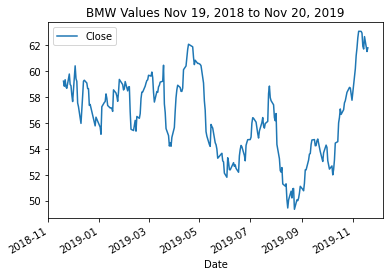

In [13]:
ticker = yf.Ticker('BMW.DE')
BMW_test = ticker.history(start="2018-11-19", end="2019-11-20")
BMW_test = BMW_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = BMW_test.plot(title="BMW Values Nov 19, 2018 to Nov 20, 2019")

In [14]:
number_of_simulations = 1000  
BMW_number_of_days =len(BMW_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, BMW_number_of_days) 
BMW_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = BMW_test['Close'][0]

sim_val_start = BMW['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    BMW_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=BMW_number_of_days, scale =BMW_stddev )
    
    for i in range(BMW_number_of_days):
        BMW_price_est = BMW_price_est *np.exp(BMW_mean+rand_vals[i])
        BMW_returns_arr[k][i] = BMW_price_est

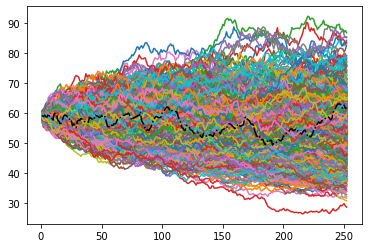

In [15]:
# plot our results
day_number = np.linspace(1,BMW_number_of_days,BMW_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,BMW_returns_arr[i])
plt.plot(day_number,BMW_test['Close'],'k-.')

### DIAGEO

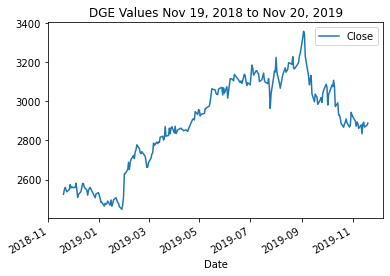

In [16]:
ticker = yf.Ticker('DGE.L')
DGE_test = ticker.history(start="2018-11-19", end="2019-11-20")
DGE_test = DGE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = DGE_test.plot(title="DGE Values Nov 19, 2018 to Nov 20, 2019")

In [17]:
number_of_simulations = 1000  
DGE_number_of_days =len(DGE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, DGE_number_of_days) 
DGE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = DGE_test['Close'][0]

sim_val_start = DGE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    DGE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=DGE_number_of_days, scale =DGE_stddev )
    
    for i in range(DGE_number_of_days):
        DGE_price_est = DGE_price_est *np.exp(DGE_mean+rand_vals[i])
        DGE_returns_arr[k][i] = DGE_price_est

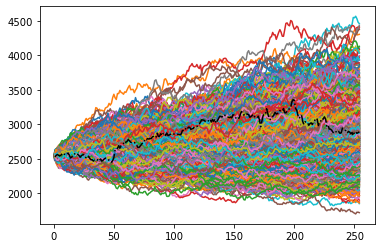

In [18]:
# plot our results
day_number = np.linspace(1,DGE_number_of_days,DGE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,DGE_returns_arr[i])
plt.plot(day_number,DGE_test['Close'],'k-.')

### NESTLE

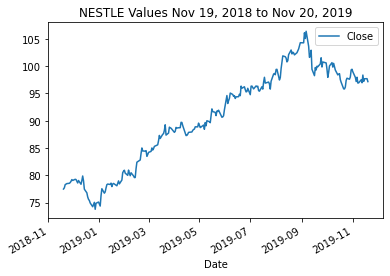

In [19]:
ticker = yf.Ticker('NSRGY')
NESTLE_test = ticker.history(start="2018-11-19", end="2019-11-20")
NESTLE_test = NESTLE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NESTLE_test.plot(title="NESTLE Values Nov 19, 2018 to Nov 20, 2019")

In [20]:
number_of_simulations = 1000  
NESTLE_number_of_days =len(NESTLE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, NESTLE_number_of_days) 
NESTLE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = NESTLE_test['Close'][0]

sim_val_start = NESTLE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    NESTLE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=NESTLE_number_of_days, scale =NESTLE_stddev )
    
    for i in range(NESTLE_number_of_days):
        NESTLE_price_est = NESTLE_price_est *np.exp(NESTLE_mean+rand_vals[i])
        NESTLE_returns_arr[k][i] = NESTLE_price_est

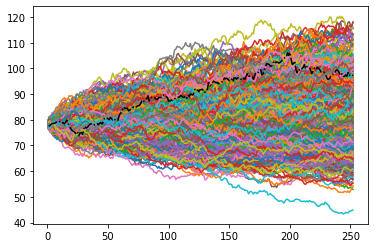

In [21]:
# plot our results
day_number = np.linspace(1,NESTLE_number_of_days,NESTLE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,NESTLE_returns_arr[i])
plt.plot(day_number,NESTLE_test['Close'],'k-.')

### NIKE

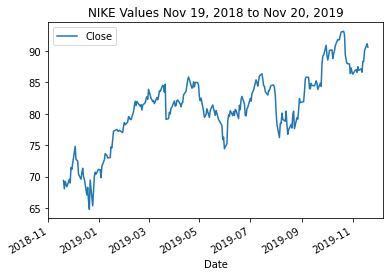

In [22]:
ticker = yf.Ticker('NKE')
NIKE_test = ticker.history(start="2018-11-19", end="2019-11-20")
NIKE_test = NIKE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NIKE_test.plot(title="NIKE Values Nov 19, 2018 to Nov 20, 2019")

In [23]:
number_of_simulations = 1000  
NIKE_number_of_days =len(NIKE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, NIKE_number_of_days) 
NIKE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = NIKE_test['Close'][0]

sim_val_start = NIKE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    NIKE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=NIKE_number_of_days, scale =NIKE_stddev )
    
    for i in range(NIKE_number_of_days):
        NIKE_price_est = NIKE_price_est *np.exp(NIKE_mean+rand_vals[i])
        NIKE_returns_arr[k][i] = NIKE_price_est

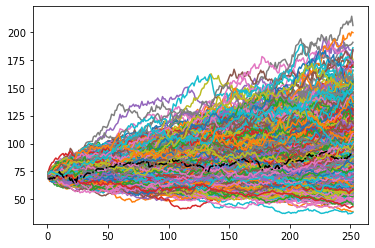

In [24]:
# plot our results
day_number = np.linspace(1,NIKE_number_of_days,NIKE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,NIKE_returns_arr[i])
plt.plot(day_number,NIKE_test['Close'],'k-.')

### VISA

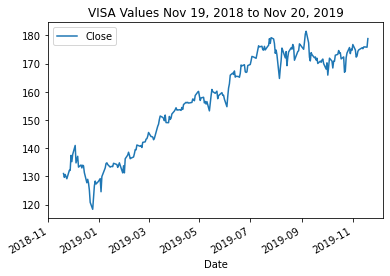

In [25]:
ticker = yf.Ticker('V')
VISA_test = ticker.history(start="2018-11-19", end="2019-11-20")
VISA_test = VISA_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = VISA_test.plot(title="VISA Values Nov 19, 2018 to Nov 20, 2019")

In [26]:
number_of_simulations = 1000  
VISA_number_of_days =len(VISA_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, VISA_number_of_days) 
VISA_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = VISA_test['Close'][0]

sim_val_start = VISA['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    VISA_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=VISA_number_of_days, scale =VISA_stddev )
    
    for i in range(VISA_number_of_days):
        VISA_price_est = VISA_price_est *np.exp(VISA_mean+rand_vals[i])
        VISA_returns_arr[k][i] = VISA_price_est

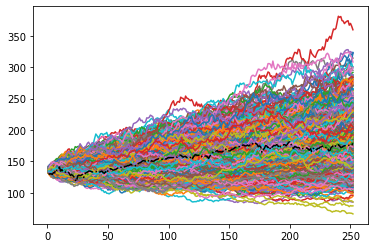

In [27]:
# plot our results
day_number = np.linspace(1,VISA_number_of_days,VISA_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,VISA_returns_arr[i])
plt.plot(day_number,VISA_test['Close'],'k-.')

### Question 3:
Compute the probability of redemption on the first valuation date.

Note: The qualification for early redemption on the first redemption date is that each equity mush be at least 85% of it's value on the first validation date. Using the Monte Carlo simulation, what is the probabily that BMW.DE >= 85% of it's value on the first redemption date, and DGE.L is >= 85% of it's value on the first redemption date, and NESN.SW is >= 85% of it's value on the first redemption date, V is >= 85% of it's value on the first redemption date.

Be sure to show your probability density functions computed from the simulation results.

### BMW

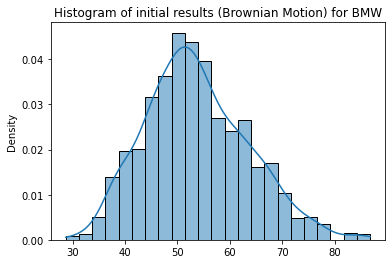

In [28]:
initial_results_BMW = []
for i in range(number_of_simulations):
    initial_results_BMW.append(BMW_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(initial_results_BMW, kde=True, stat="density").set(title="Histogram of initial results (Brownian Motion) for BMW")

In [29]:
initial_BMW_85 = 0.85 * BMW_test['Close'][0]
print("initial share price x 0.85 =",initial_BMW_85)
df['BMW']['85% of initial price'] = initial_BMW_85


density = scipy.stats.gaussian_kde(initial_results_BMW)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_BMW_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['BMW']['prob at n=1'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 50.33080139160156
probabilty greater than 85%  = 60.47476671319456


### DIAGEO

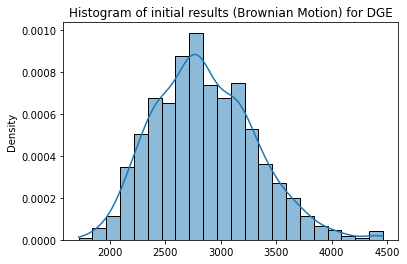

In [30]:
initial_results_DGE = []
for i in range(number_of_simulations):
    initial_results_DGE.append(DGE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(initial_results_DGE, kde=True, stat="density").set(title="Histogram of initial results (Brownian Motion) for DGE")

In [31]:
initial_DGE_85 = 0.85 * DGE_test['Close'][0]
print("initial share price x 0.85 =",initial_DGE_85)
df['DIAGEO']['85% of initial price'] = initial_DGE_85

density = scipy.stats.gaussian_kde(initial_results_DGE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_DGE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['DIAGEO']['prob at n=1'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 2146.1562011718747
probabilty greater than 85%  = 95.20299772470018


### NESTLE

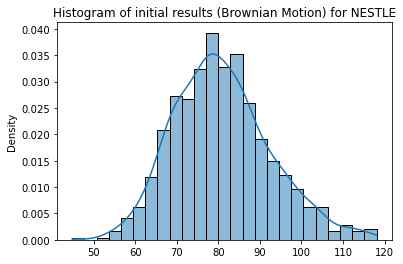

In [32]:
initial_results_NESTLE = []
for i in range(number_of_simulations):
    initial_results_NESTLE.append(NESTLE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(initial_results_NESTLE, kde=True, stat="density").set(title="Histogram of initial results (Brownian Motion) for NESTLE")

In [33]:
initial_NESTLE_85 = 0.85 * NESTLE_test['Close'][0]
print("initial share price x 0.85 =",initial_NESTLE_85)
df['NESTLE']['85% of initial price'] = initial_NESTLE_85

density = scipy.stats.gaussian_kde(initial_results_NESTLE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_NESTLE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['NESTLE']['prob at n=1'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 65.86754875183105
probabilty greater than 85%  = 90.84535513202255


### NIKE

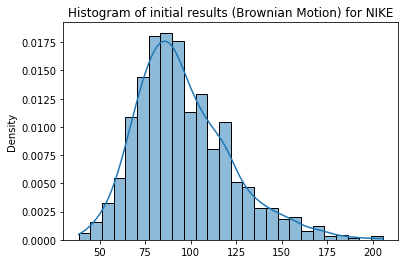

In [34]:
initial_results_NIKE = []
for i in range(number_of_simulations):
    initial_results_NIKE.append(NIKE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(initial_results_NIKE, kde=True, stat="density").set(title="Histogram of initial results (Brownian Motion) for NIKE")

In [35]:
initial_NIKE_85 = 0.85 * NIKE_test['Close'][0]
print("initial share price x 0.85 =",initial_NIKE_85)
df['NIKE']['85% of initial price'] = initial_NIKE_85

density = scipy.stats.gaussian_kde(initial_results_NIKE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_NIKE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['NIKE']['prob at n=1'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 58.98801689147949
probabilty greater than 85%  = 95.06883387080912


### VISA

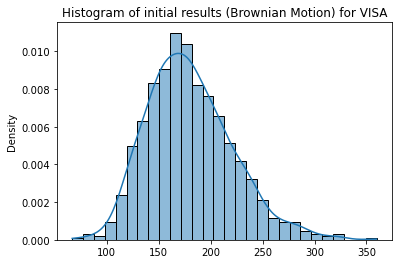

In [36]:
initial_results_VISA = []
for i in range(number_of_simulations):
    initial_results_VISA.append(VISA_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(initial_results_VISA, kde=True, stat="density").set(title="Histogram of initial results (Brownian Motion) for VISA")

In [37]:
initial_VISA_85 = 0.85 * VISA_test['Close'][0]
print("initial share price x 0.85 =",initial_VISA_85)
df['VISA']['85% of initial price'] = initial_VISA_85

density = scipy.stats.gaussian_kde(initial_results_VISA)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_VISA_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['VISA']['prob at n=1'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 111.36656265258789
probabilty greater than 85%  = 97.08219838446038


### Question 4:
Perform Monte Carlo simulations on each of the five equities from trade date to second early redemption date and plot the simulations. Again be sure to show your simulations on a graph over time.

### Second redemption date: May 20th, 2020


### BMW

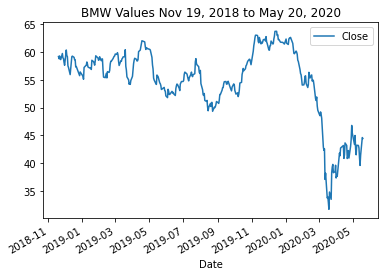

In [38]:
ticker = yf.Ticker('BMW.DE')
BMW_test = ticker.history(start="2018-11-19", end="2020-05-20")
BMW_test = BMW_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = BMW_test.plot(title="BMW Values Nov 19, 2018 to May 20, 2020")

In [39]:
number_of_simulations = 1000  
BMW_number_of_days =len(BMW_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, BMW_number_of_days) 
BMW_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = BMW_test['Close'][0]

sim_val_start = BMW['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    BMW_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=BMW_number_of_days, scale =BMW_stddev )
    
    for i in range(BMW_number_of_days):
        BMW_price_est = BMW_price_est *np.exp(BMW_mean+rand_vals[i])
        BMW_returns_arr[k][i] = BMW_price_est

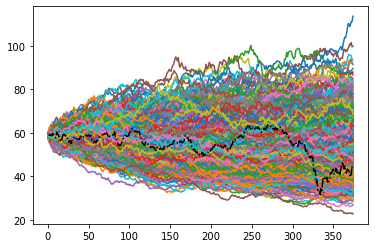

In [40]:
# plot our results
day_number = np.linspace(1,BMW_number_of_days,BMW_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,BMW_returns_arr[i])
plt.plot(day_number,BMW_test['Close'],'k-.')

### DIAGEO

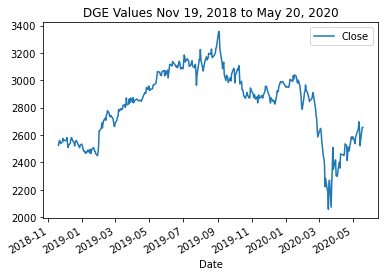

In [41]:
ticker = yf.Ticker('DGE.L')
DGE_test = ticker.history(start="2018-11-19", end="2020-05-20")
DGE_test = DGE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = DGE_test.plot(title="DGE Values Nov 19, 2018 to May 20, 2020")

In [42]:
number_of_simulations = 1000  
DGE_number_of_days =len(DGE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, DGE_number_of_days) 
DGE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = DGE_test['Close'][0]

sim_val_start = DGE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    DGE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=DGE_number_of_days, scale =DGE_stddev )
    
    for i in range(DGE_number_of_days):
        DGE_price_est = DGE_price_est *np.exp(DGE_mean+rand_vals[i])
        DGE_returns_arr[k][i] = DGE_price_est

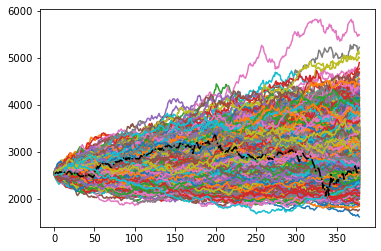

In [43]:
# plot our results
day_number = np.linspace(1,DGE_number_of_days,DGE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,DGE_returns_arr[i])
plt.plot(day_number,DGE_test['Close'],'k-.')

### NESTLE

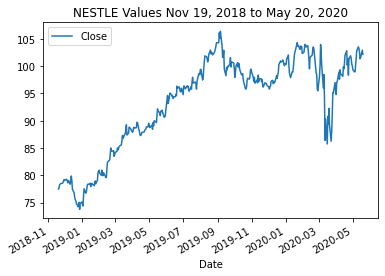

In [44]:
ticker = yf.Ticker('NSRGY')
NESTLE_test = ticker.history(start="2018-11-19", end="2020-05-20")
NESTLE_test = NESTLE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NESTLE_test.plot(title="NESTLE Values Nov 19, 2018 to May 20, 2020")

In [45]:
number_of_simulations = 1000  
NESTLE_number_of_days =len(NESTLE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, NESTLE_number_of_days) 
NESTLE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = NESTLE_test['Close'][0]

sim_val_start = NESTLE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    NESTLE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=NESTLE_number_of_days, scale =NESTLE_stddev )
    
    for i in range(NESTLE_number_of_days):
        NESTLE_price_est = NESTLE_price_est *np.exp(NESTLE_mean+rand_vals[i])
        NESTLE_returns_arr[k][i] = NESTLE_price_est

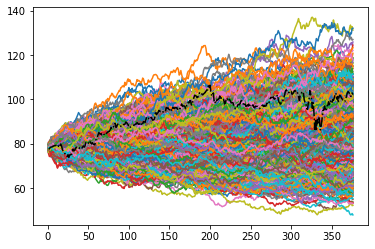

In [46]:
# plot our results
day_number = np.linspace(1,NESTLE_number_of_days,NESTLE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,NESTLE_returns_arr[i])
plt.plot(day_number,NESTLE_test['Close'],'k-.')

### NIKE

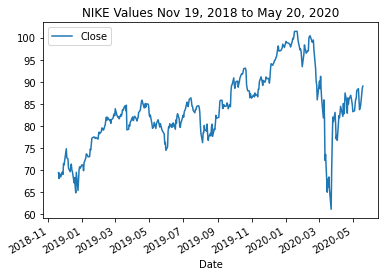

In [47]:
ticker = yf.Ticker('NKE')
NIKE_test = ticker.history(start="2018-11-19", end="2020-05-20")
NIKE_test = NIKE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NIKE_test.plot(title="NIKE Values Nov 19, 2018 to May 20, 2020")

In [48]:
number_of_simulations = 1000  
NIKE_number_of_days =len(NIKE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, NIKE_number_of_days) 
NIKE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = NIKE_test['Close'][0]

sim_val_start = NIKE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    NIKE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=NIKE_number_of_days, scale =NIKE_stddev )
    
    for i in range(NIKE_number_of_days):
        NIKE_price_est = NIKE_price_est *np.exp(NIKE_mean+rand_vals[i])
        NIKE_returns_arr[k][i] = NIKE_price_est

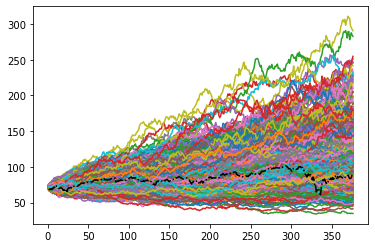

In [49]:
# plot our results
day_number = np.linspace(1,NIKE_number_of_days,NIKE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,NIKE_returns_arr[i])
plt.plot(day_number,NIKE_test['Close'],'k-.')

### VISA

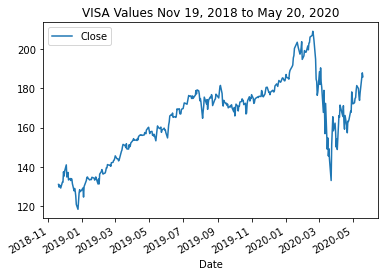

In [50]:
ticker = yf.Ticker('V')
VISA_test = ticker.history(start="2018-11-19", end="2020-05-20")
VISA_test = VISA_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = VISA_test.plot(title="VISA Values Nov 19, 2018 to May 20, 2020")

In [51]:
number_of_simulations = 1000  
VISA_number_of_days =len(VISA_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, VISA_number_of_days) 
VISA_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = VISA_test['Close'][0]

sim_val_start = VISA['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    VISA_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=VISA_number_of_days, scale =VISA_stddev )
    
    for i in range(VISA_number_of_days):
        VISA_price_est = VISA_price_est *np.exp(VISA_mean+rand_vals[i])
        VISA_returns_arr[k][i] = VISA_price_est

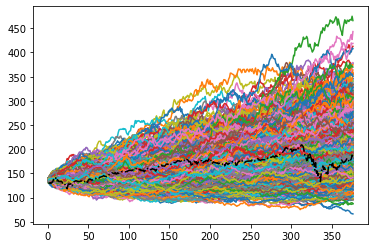

In [52]:
# plot our results
day_number = np.linspace(1,VISA_number_of_days,VISA_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,VISA_returns_arr[i])
plt.plot(day_number,VISA_test['Close'],'k-.')

### Question 5:

Compute the probability of redemption on the Second valuation date. Again, be sure to show your probability density function.

### BMW

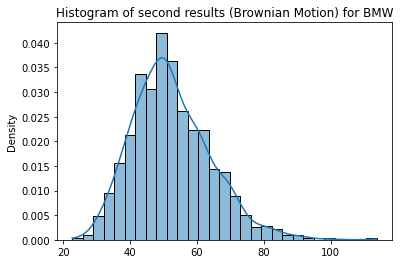

In [53]:
second_results_BMW = []
for i in range(number_of_simulations):
    second_results_BMW.append(BMW_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(second_results_BMW, kde=True, stat="density").set(title="Histogram of second results (Brownian Motion) for BMW")

In [54]:
initial_BMW_85 = 0.85 * BMW_test['Close'][0]
print("initial share price x 0.85 =", initial_BMW_85)

density = scipy.stats.gaussian_kde(second_results_BMW)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_BMW_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['BMW']['prob at n=2'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 50.33080139160156
probabilty greater than 85%  = 52.736590236236616


### DIAGEO

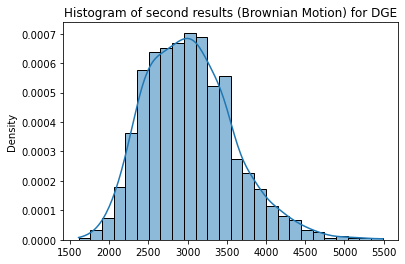

In [55]:
second_results_DGE = []
for i in range(number_of_simulations):
    second_results_DGE.append(DGE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(second_results_DGE, kde=True, stat="density").set(title="Histogram of second results (Brownian Motion) for DGE")

In [56]:
initial_DGE_85 = 0.85 * DGE_test['Close'][0]
print("initial share price x 0.85 =", initial_DGE_85)

density = scipy.stats.gaussian_kde(second_results_DGE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_DGE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['DIAGEO']['prob at n=2'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 2146.1557861328124
probabilty greater than 85%  = 95.8480814100674


### NESTLE

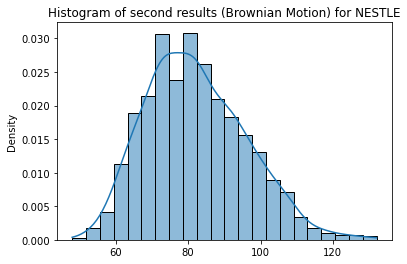

In [57]:
second_results_NESTLE = []
for i in range(number_of_simulations):
    second_results_NESTLE.append(NESTLE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(second_results_NESTLE, kde=True, stat="density").set(title="Histogram of second results (Brownian Motion) for NESTLE")

In [58]:
initial_NESTLE_85 = 0.85 * NESTLE_test['Close'][0]
print("initial share price x 0.85 =", initial_NESTLE_85)

density = scipy.stats.gaussian_kde(second_results_NESTLE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_NESTLE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['NESTLE']['prob at n=2'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 65.86754875183105
probabilty greater than 85%  = 88.06054708766983


### NIKE

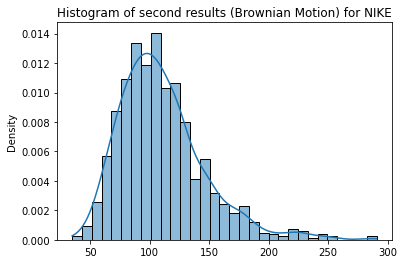

In [59]:
second_results_NIKE = []
for i in range(number_of_simulations):
    second_results_NIKE.append(NIKE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(second_results_NIKE, kde=True, stat="density").set(title="Histogram of second results (Brownian Motion) for NIKE")

In [60]:
initial_NIKE_85 = 0.85 * NIKE_test['Close'][0]
print("initial share price x 0.85 =", initial_NIKE_85)

density = scipy.stats.gaussian_kde(second_results_NIKE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_NIKE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['NIKE']['prob at n=2'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 58.988029861450194
probabilty greater than 85%  = 95.75469465094694


### VISA

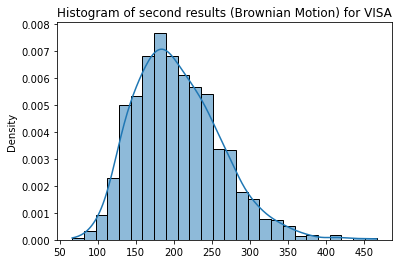

In [61]:
second_results_VISA = []
for i in range(number_of_simulations):
    second_results_VISA.append(VISA_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(second_results_VISA, kde=True, stat="density").set(title="Histogram of second results (Brownian Motion) for VISA")

In [62]:
initial_VISA_85 = 0.85 * VISA_test['Close'][0]
print("initial share price x 0.85 =", initial_VISA_85)

density = scipy.stats.gaussian_kde(second_results_VISA)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_VISA_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['VISA']['prob at n=2'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 111.36654968261719
probabilty greater than 85%  = 97.32975288264852


### Question 6:
Perform Monte Carlo simulations on each of the five equities from trade date to third early redemption date. 

### Third redemption date: November 20th, 2020


### BMW

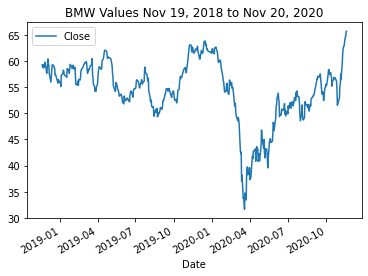

In [63]:
ticker = yf.Ticker('BMW.DE')
BMW_test = ticker.history(start="2018-11-19", end="2020-11-20")
BMW_test = BMW_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = BMW_test.plot(title="BMW Values Nov 19, 2018 to Nov 20, 2020")

In [64]:
number_of_simulations = 1000  
BMW_number_of_days =len(BMW_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, BMW_number_of_days) 
BMW_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = BMW_test['Close'][0]

sim_val_start = BMW['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    BMW_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=BMW_number_of_days, scale =BMW_stddev )
    
    for i in range(BMW_number_of_days):
        BMW_price_est = BMW_price_est *np.exp(BMW_mean+rand_vals[i])
        BMW_returns_arr[k][i] = BMW_price_est

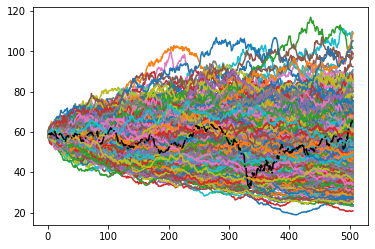

In [65]:
# plot our results
day_number = np.linspace(1,BMW_number_of_days,BMW_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,BMW_returns_arr[i])
plt.plot(day_number,BMW_test['Close'],'k-.')

### DIAGEO

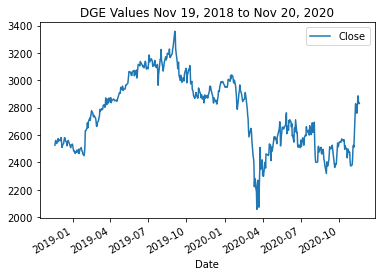

In [66]:
ticker = yf.Ticker('DGE.L')
DGE_test = ticker.history(start="2018-11-19", end="2020-11-20")
DGE_test = DGE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = DGE_test.plot(title="DGE Values Nov 19, 2018 to Nov 20, 2020")

In [67]:
number_of_simulations = 1000  
DGE_number_of_days =len(DGE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, DGE_number_of_days) 
DGE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = DGE_test['Close'][0]

sim_val_start = DGE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    DGE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=DGE_number_of_days, scale =DGE_stddev )
    
    for i in range(DGE_number_of_days):
        DGE_price_est = DGE_price_est *np.exp(DGE_mean+rand_vals[i])
        DGE_returns_arr[k][i] = DGE_price_est

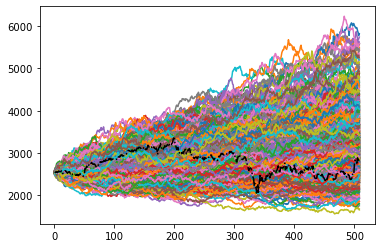

In [68]:
# plot our results
day_number = np.linspace(1,DGE_number_of_days,DGE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,DGE_returns_arr[i])
plt.plot(day_number,DGE_test['Close'],'k-.')

### NESTLE

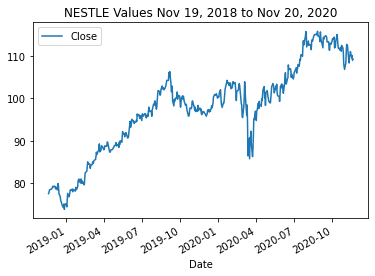

In [69]:
ticker = yf.Ticker('NSRGY')
NESTLE_test = ticker.history(start="2018-11-19", end="2020-11-20")
NESTLE_test = NESTLE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NESTLE_test.plot(title="NESTLE Values Nov 19, 2018 to Nov 20, 2020")

In [70]:
number_of_simulations = 1000  
NESTLE_number_of_days =len(NESTLE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, NESTLE_number_of_days) 
NESTLE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = NESTLE_test['Close'][0]

sim_val_start = NESTLE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    NESTLE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=NESTLE_number_of_days, scale =NESTLE_stddev )
    
    for i in range(NESTLE_number_of_days):
        NESTLE_price_est = NESTLE_price_est *np.exp(NESTLE_mean+rand_vals[i])
        NESTLE_returns_arr[k][i] = NESTLE_price_est

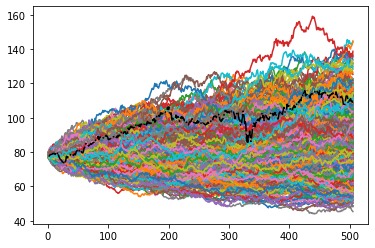

In [71]:
# plot our results
day_number = np.linspace(1,NESTLE_number_of_days,NESTLE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,NESTLE_returns_arr[i])
plt.plot(day_number,NESTLE_test['Close'],'k-.')

### NIKE

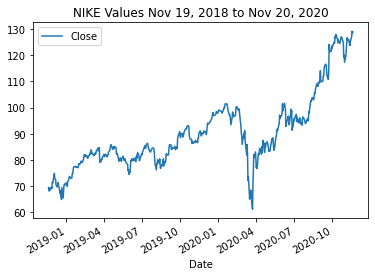

In [72]:
ticker = yf.Ticker('NKE')
NIKE_test = ticker.history(start="2018-11-19", end="2020-11-20")
NIKE_test = NIKE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NIKE_test.plot(title="NIKE Values Nov 19, 2018 to Nov 20, 2020")

In [73]:
number_of_simulations = 1000  
NIKE_number_of_days =len(NIKE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, NIKE_number_of_days) 
NIKE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = NIKE_test['Close'][0]

sim_val_start = NIKE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    NIKE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=NIKE_number_of_days, scale =NIKE_stddev )
    
    for i in range(NIKE_number_of_days):
        NIKE_price_est = NIKE_price_est *np.exp(NIKE_mean+rand_vals[i])
        NIKE_returns_arr[k][i] = NIKE_price_est

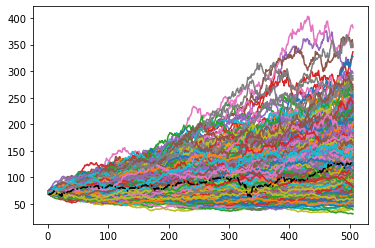

In [74]:
# plot our results
day_number = np.linspace(1,NIKE_number_of_days,NIKE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,NIKE_returns_arr[i])
plt.plot(day_number,NIKE_test['Close'],'k-.')

### VISA

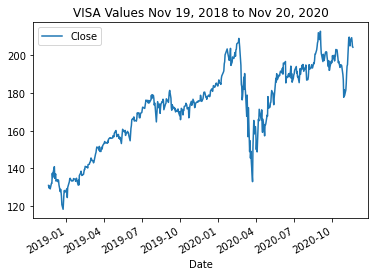

In [75]:
ticker = yf.Ticker('V')
VISA_test = ticker.history(start="2018-11-19", end="2020-11-20")
VISA_test = VISA_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = VISA_test.plot(title="VISA Values Nov 19, 2018 to Nov 20, 2020")

In [76]:
number_of_simulations = 1000  
VISA_number_of_days =len(VISA_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, VISA_number_of_days) 
VISA_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = VISA_test['Close'][0]

sim_val_start = VISA['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    VISA_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=VISA_number_of_days, scale =VISA_stddev )
    
    for i in range(VISA_number_of_days):
        VISA_price_est = VISA_price_est *np.exp(VISA_mean+rand_vals[i])
        VISA_returns_arr[k][i] = VISA_price_est

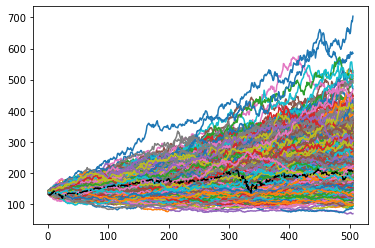

In [77]:
# plot our results
day_number = np.linspace(1,VISA_number_of_days,VISA_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,VISA_returns_arr[i])
plt.plot(day_number,VISA_test['Close'],'k-.')

### Question 7:
Compute the probability of redemption on the third valuation date.

### BMW

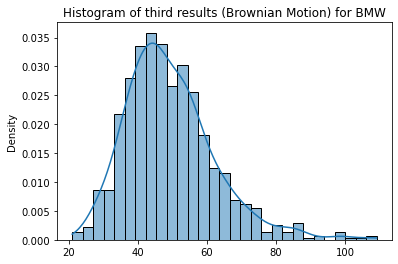

In [78]:
third_results_BMW = []
for i in range(number_of_simulations):
    third_results_BMW.append(BMW_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(third_results_BMW, kde=True, stat="density").set(title="Histogram of third results (Brownian Motion) for BMW")

In [79]:
initial_BMW_85 = 0.85 * BMW_test['Close'][0]
print("initial share price x 0.85 =", initial_BMW_85)

density = scipy.stats.gaussian_kde(third_results_BMW)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_BMW_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['BMW']['prob at n=3'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 50.330804634094235
probabilty greater than 85%  = 41.71408727176625


### DIAGEO

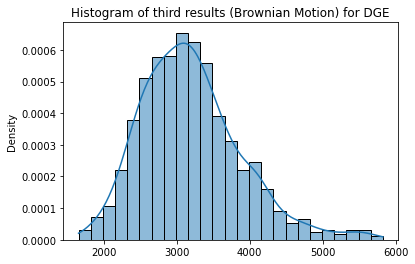

In [80]:
third_results_DGE = []
for i in range(number_of_simulations):
    third_results_DGE.append(DGE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(third_results_DGE, kde=True, stat="density").set(title="Histogram of third results (Brownian Motion) for DGE")

In [81]:
initial_DGE_85 = 0.85 * DGE_test['Close'][0]
print("initial share price x 0.85 =", initial_DGE_85)

density = scipy.stats.gaussian_kde(third_results_DGE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_DGE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['DIAGEO']['prob at n=3'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 2146.1559936523436
probabilty greater than 85%  = 95.80101734549267


### NESTLE

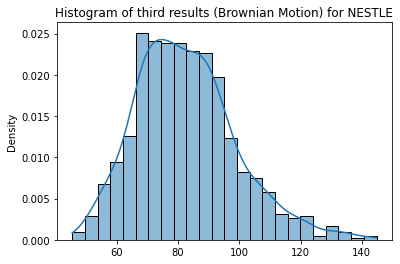

In [82]:
third_results_NESTLE = []
for i in range(number_of_simulations):
    third_results_NESTLE.append(NESTLE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(third_results_NESTLE, kde=True, stat="density").set(title="Histogram of third results (Brownian Motion) for NESTLE")

In [83]:
initial_NESTLE_85 = 0.85 * NESTLE_test['Close'][0]
print("initial share price x 0.85 =", initial_NESTLE_85)

density = scipy.stats.gaussian_kde(third_results_NESTLE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_NESTLE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['NESTLE']['prob at n=3'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 65.86754875183105
probabilty greater than 85%  = 84.9659875513914


### NIKE

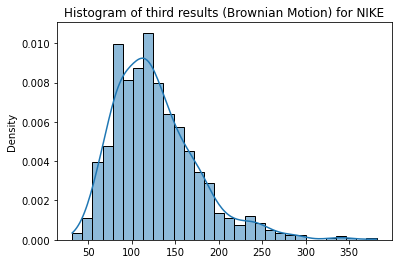

In [84]:
third_results_NIKE = []
for i in range(number_of_simulations):
    third_results_NIKE.append(NIKE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(third_results_NIKE, kde=True, stat="density").set(title="Histogram of third results (Brownian Motion) for NIKE")

In [85]:
initial_NIKE_85 = 0.85 * NIKE_test['Close'][0]
print("initial share price x 0.85 =", initial_NIKE_85)

density = scipy.stats.gaussian_kde(third_results_NIKE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_NIKE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['NIKE']['prob at n=3'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 58.988023376464845
probabilty greater than 85%  = 95.49948237246568


### VISA

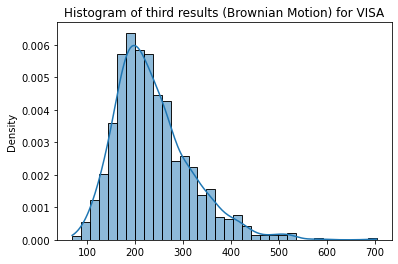

In [86]:
third_results_VISA = []
for i in range(number_of_simulations):
    third_results_VISA.append(VISA_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(third_results_VISA, kde=True, stat="density").set(title="Histogram of third results (Brownian Motion) for VISA")

In [87]:
initial_VISA_85 = 0.85 * VISA_test['Close'][0]
print("initial share price x 0.85 =", initial_VISA_85)

density = scipy.stats.gaussian_kde(third_results_VISA)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_VISA_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['VISA']['prob at n=3'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 111.3665885925293
probabilty greater than 85%  = 97.5038628081881


### Question 8:

Perform Monte Carlo simulations on each of the five equities from trade date to fourth early redemption date.


### Fourth redemption date: May 20th, 2021


### BMW

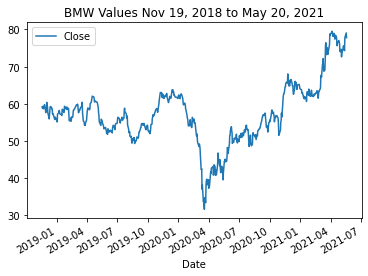

In [88]:
ticker = yf.Ticker('BMW.DE')
BMW_test = ticker.history(start="2018-11-19", end="2021-05-20")
BMW_test = BMW_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = BMW_test.plot(title="BMW Values Nov 19, 2018 to May 20, 2021")

In [89]:
number_of_simulations = 1000  
BMW_number_of_days =len(BMW_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, BMW_number_of_days) 
BMW_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = BMW_test['Close'][0]

sim_val_start = BMW['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    BMW_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=BMW_number_of_days, scale =BMW_stddev )
    
    for i in range(BMW_number_of_days):
        BMW_price_est = BMW_price_est *np.exp(BMW_mean+rand_vals[i])
        BMW_returns_arr[k][i] = BMW_price_est

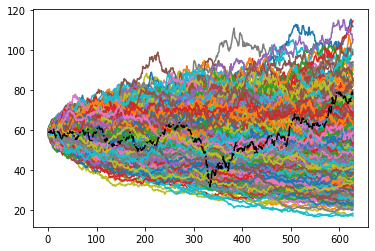

In [90]:
# plot our results
day_number = np.linspace(1,BMW_number_of_days,BMW_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,BMW_returns_arr[i])
plt.plot(day_number,BMW_test['Close'],'k-.')

### DIAGEO

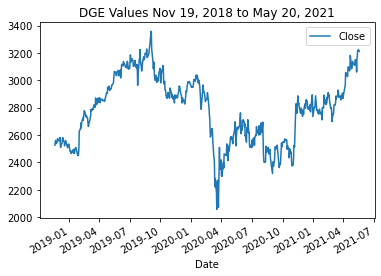

In [91]:
ticker = yf.Ticker('DGE.L')
DGE_test = ticker.history(start="2018-11-19", end="2021-05-20")
DGE_test = DGE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = DGE_test.plot(title="DGE Values Nov 19, 2018 to May 20, 2021")

In [92]:
number_of_simulations = 1000  
DGE_number_of_days =len(DGE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, DGE_number_of_days) 
DGE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = DGE_test['Close'][0]

sim_val_start = DGE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    DGE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=DGE_number_of_days, scale =DGE_stddev )
    
    for i in range(DGE_number_of_days):
        DGE_price_est = DGE_price_est *np.exp(DGE_mean+rand_vals[i])
        DGE_returns_arr[k][i] = DGE_price_est

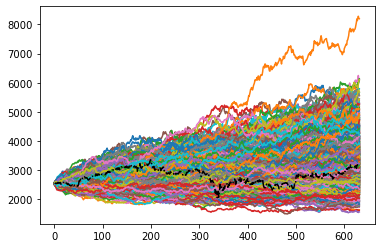

In [93]:
# plot our results
day_number = np.linspace(1,DGE_number_of_days,DGE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,DGE_returns_arr[i])
plt.plot(day_number,DGE_test['Close'],'k-.')

### NESTLE

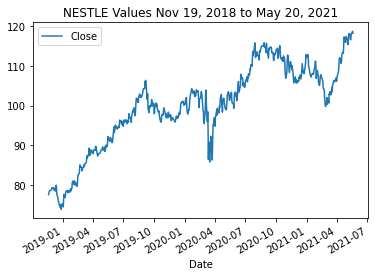

In [94]:
ticker = yf.Ticker('NSRGY')
NESTLE_test = ticker.history(start="2018-11-19", end="2021-05-20")
NESTLE_test = NESTLE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NESTLE_test.plot(title="NESTLE Values Nov 19, 2018 to May 20, 2021")

In [95]:
number_of_simulations = 1000  
NESTLE_number_of_days =len(NESTLE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, NESTLE_number_of_days) 
NESTLE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = NESTLE_test['Close'][0]

sim_val_start = NESTLE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    NESTLE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=NESTLE_number_of_days, scale =NESTLE_stddev )
    
    for i in range(NESTLE_number_of_days):
        NESTLE_price_est = NESTLE_price_est *np.exp(NESTLE_mean+rand_vals[i])
        NESTLE_returns_arr[k][i] = NESTLE_price_est

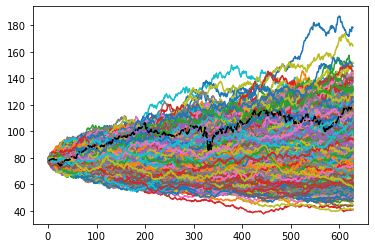

In [96]:
# plot our results
day_number = np.linspace(1,NESTLE_number_of_days,NESTLE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,NESTLE_returns_arr[i])
plt.plot(day_number,NESTLE_test['Close'],'k-.')

### NIKE

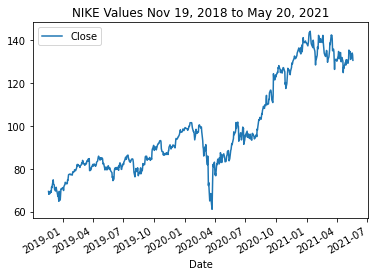

In [97]:
ticker = yf.Ticker('NKE')
NIKE_test = ticker.history(start="2018-11-19", end="2021-05-20")
NIKE_test = NIKE_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = NIKE_test.plot(title="NIKE Values Nov 19, 2018 to May 20, 2021")

In [98]:
number_of_simulations = 1000  
NIKE_number_of_days =len(NIKE_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, NIKE_number_of_days) 
NIKE_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = NIKE_test['Close'][0]

sim_val_start = NIKE['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    NIKE_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=NIKE_number_of_days, scale =NIKE_stddev )
    
    for i in range(NIKE_number_of_days):
        NIKE_price_est = NIKE_price_est *np.exp(NIKE_mean+rand_vals[i])
        NIKE_returns_arr[k][i] = NIKE_price_est

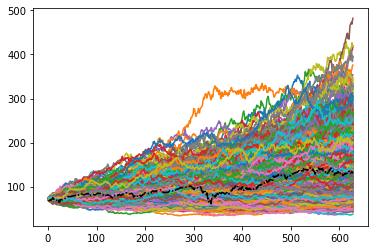

In [99]:
# plot our results
day_number = np.linspace(1,NIKE_number_of_days,NIKE_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,NIKE_returns_arr[i])
plt.plot(day_number,NIKE_test['Close'],'k-.')

### VISA

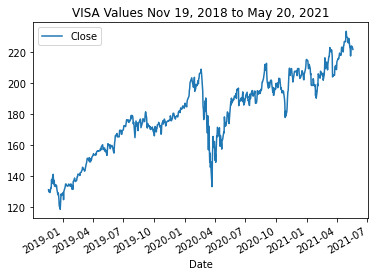

In [100]:
ticker = yf.Ticker('V')
VISA_test = ticker.history(start="2018-11-19", end="2021-05-20")
VISA_test = VISA_test.drop(['Open','High','Low','Volume','Dividends', 'Stock Splits'],axis=1)

plot = VISA_test.plot(title="VISA Values Nov 19, 2018 to May 20, 2021")

In [101]:
number_of_simulations = 1000  
VISA_number_of_days =len(VISA_test)

# build an array to hold our simulation results
rows, cols = (number_of_simulations, VISA_number_of_days) 
VISA_returns_arr = [[0 for i in range(cols)] for j in range(rows)]
sim_val_start = VISA_test['Close'][0]

sim_val_start = VISA['Close'][-1] # last day, starting point for our simulation
for k in range(number_of_simulations):
    
    # assign a variable which will be the estimated price
    VISA_price_est = sim_val_start
    
    # get number_of_days samples from a normal distribution with the standard deviation computed from the historical data
    rand_vals = np.random.normal(size=VISA_number_of_days, scale =VISA_stddev )
    
    for i in range(VISA_number_of_days):
        VISA_price_est = VISA_price_est *np.exp(VISA_mean+rand_vals[i])
        VISA_returns_arr[k][i] = VISA_price_est

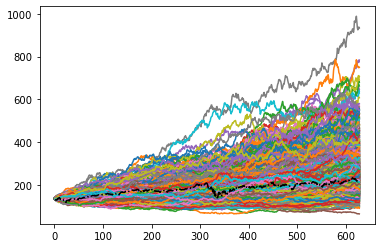

In [102]:
# plot our results
day_number = np.linspace(1,VISA_number_of_days,VISA_number_of_days) # x-axis for plotting
    
for i in range(number_of_simulations):
    plt.plot(day_number,VISA_returns_arr[i])
plt.plot(day_number,VISA_test['Close'],'k-.')

### Question 9:
Compute the probability of redemption on the fourth valuation date.

### BMW

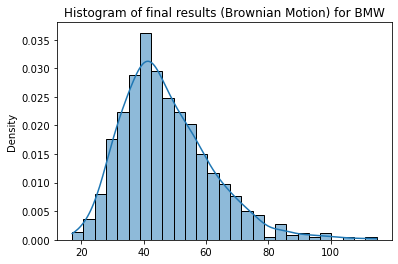

In [103]:
final_results_BMW = []
for i in range(number_of_simulations):
    final_results_BMW.append(BMW_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(final_results_BMW, kde=True, stat="density").set(title="Histogram of final results (Brownian Motion) for BMW")

In [104]:
initial_BMW_85 = 0.85 * BMW_test['Close'][0]
print("initial share price x 0.85 =", initial_BMW_85)

density = scipy.stats.gaussian_kde(final_results_BMW)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_BMW_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['BMW']['prob at n=4'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 50.33080139160156
probabilty greater than 85%  = 36.148486340315166


### DIAGEO

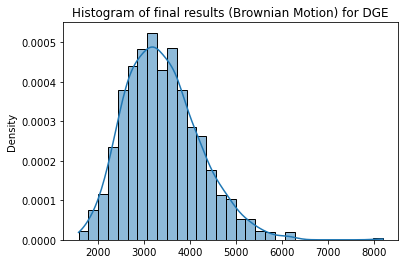

In [105]:
final_results_DGE = []
for i in range(number_of_simulations):
    final_results_DGE.append(DGE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(final_results_DGE, kde=True, stat="density").set(title="Histogram of final results (Brownian Motion) for DGE")

In [106]:
initial_DGE_85 = 0.85 * DGE_test['Close'][0]
print("initial share price x 0.85 =", initial_DGE_85)

density = scipy.stats.gaussian_kde(final_results_DGE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_DGE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['DIAGEO']['prob at n=4'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 2146.1559936523436
probabilty greater than 85%  = 95.46120574166


### NESTLE

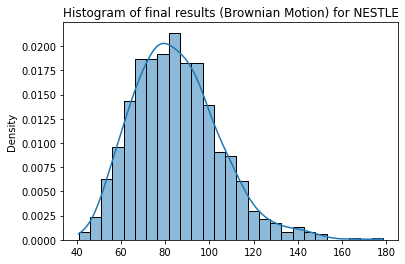

In [107]:
final_results_NESTLE = []
for i in range(number_of_simulations):
    final_results_NESTLE.append(NESTLE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(final_results_NESTLE, kde=True, stat="density").set(title="Histogram of final results (Brownian Motion) for NESTLE")

In [108]:
initial_NESTLE_85 = 0.85 * NESTLE_test['Close'][0]
print("initial share price x 0.85 =", initial_NESTLE_85)

density = scipy.stats.gaussian_kde(final_results_NESTLE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_NESTLE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['NESTLE']['prob at n=4'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 65.86754875183105
probabilty greater than 85%  = 82.9792442014092


### NIKE

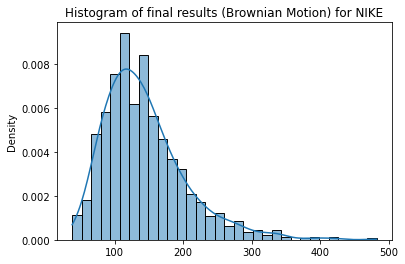

In [109]:
final_results_NIKE = []
for i in range(number_of_simulations):
    final_results_NIKE.append(NIKE_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(final_results_NIKE, kde=True, stat="density").set(title="Histogram of final results (Brownian Motion) for NIKE")

In [110]:
initial_NIKE_85 = 0.85 * NIKE_test['Close'][0]
print("initial share price x 0.85 =", initial_NIKE_85)

density = scipy.stats.gaussian_kde(final_results_NIKE)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_NIKE_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['NIKE']['prob at n=4'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 58.988023376464845
probabilty greater than 85%  = 96.08424445087891


### VISA

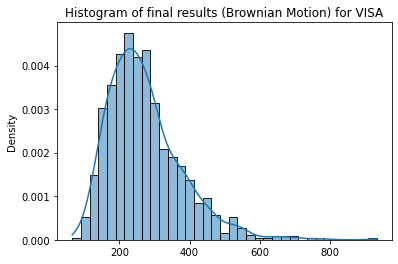

In [111]:
final_results_VISA = []
for i in range(number_of_simulations):
    final_results_VISA.append(VISA_returns_arr[i][-1]) # get the last value from every trial
ax=sns.histplot(final_results_VISA, kde=True, stat="density").set(title="Histogram of final results (Brownian Motion) for VISA")

In [112]:
initial_VISA_85 = 0.85 * VISA_test['Close'][0]
print("initial share price x 0.85 =", initial_VISA_85)

density = scipy.stats.gaussian_kde(final_results_VISA)
probability_of_greater_than_85_percent = density.integrate_box_1d(initial_VISA_85,np.infty)
print("probabilty greater than 85%  =",probability_of_greater_than_85_percent*100)
df['VISA']['prob at n=4'] = probability_of_greater_than_85_percent

initial share price x 0.85 = 111.36657562255859
probabilty greater than 85%  = 97.68002956402589


### Summary of Results

In [113]:
df

,BMW,DIAGEO,NESTLE,NIKE,VISA
log change mean,-0.000398,0.000413,0.000088,0.000975,0.000998
log change standard deviation,0.011462,0.009666,0.008751,0.01596,0.014314
85% of initial price,50.330801,2146.156201,65.867549,58.988017,111.366563
prob at n=1,0.604748,0.95203,0.908454,0.950688,0.970822
prob at n=2,0.527366,0.958481,0.880605,0.957547,0.973298
prob at n=3,0.417141,0.95801,0.84966,0.954995,0.975039
prob at n=4,0.361485,0.954612,0.829792,0.960842,0.9768


In [114]:
for i in range(3,7):
    x = 0.2*df.iloc[i].sum()*100
    if x >=85:
        print('joint probability at n=', i-2, 'is', "{:.2f}".format(x), '%, thus able to redeem at n=', i-2)
    else:
        print('joint probability at n=', i-2, 'is', "{:.2f}".format(x), '%, so not able to redeem at n=', i-2)

joint probability at n= 1 is 87.73 %, thus able to redeem at n= 1
joint probability at n= 2 is 85.95 %, thus able to redeem at n= 2
joint probability at n= 3 is 83.10 %, so not able to redeem at n= 3
joint probability at n= 4 is 81.67 %, so not able to redeem at n= 4
